In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.], shape=(1924,))

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:

def histogram(df, columns):
    import math

    num_cols =  len(columns)
    cols = math.ceil(math.sqrt(num_cols))
    rows = math.ceil(num_cols / cols)  # ← dikkat buraya!

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
    fig.suptitle("Distributions", fontsize=18, fontweight="bold")

    axes = axes.flatten()  # kolay erişim için

    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30)
        axes[i].set_title(col, fontsize=10, fontstyle="italic")

    # Boş kalan eksenleri kapat
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


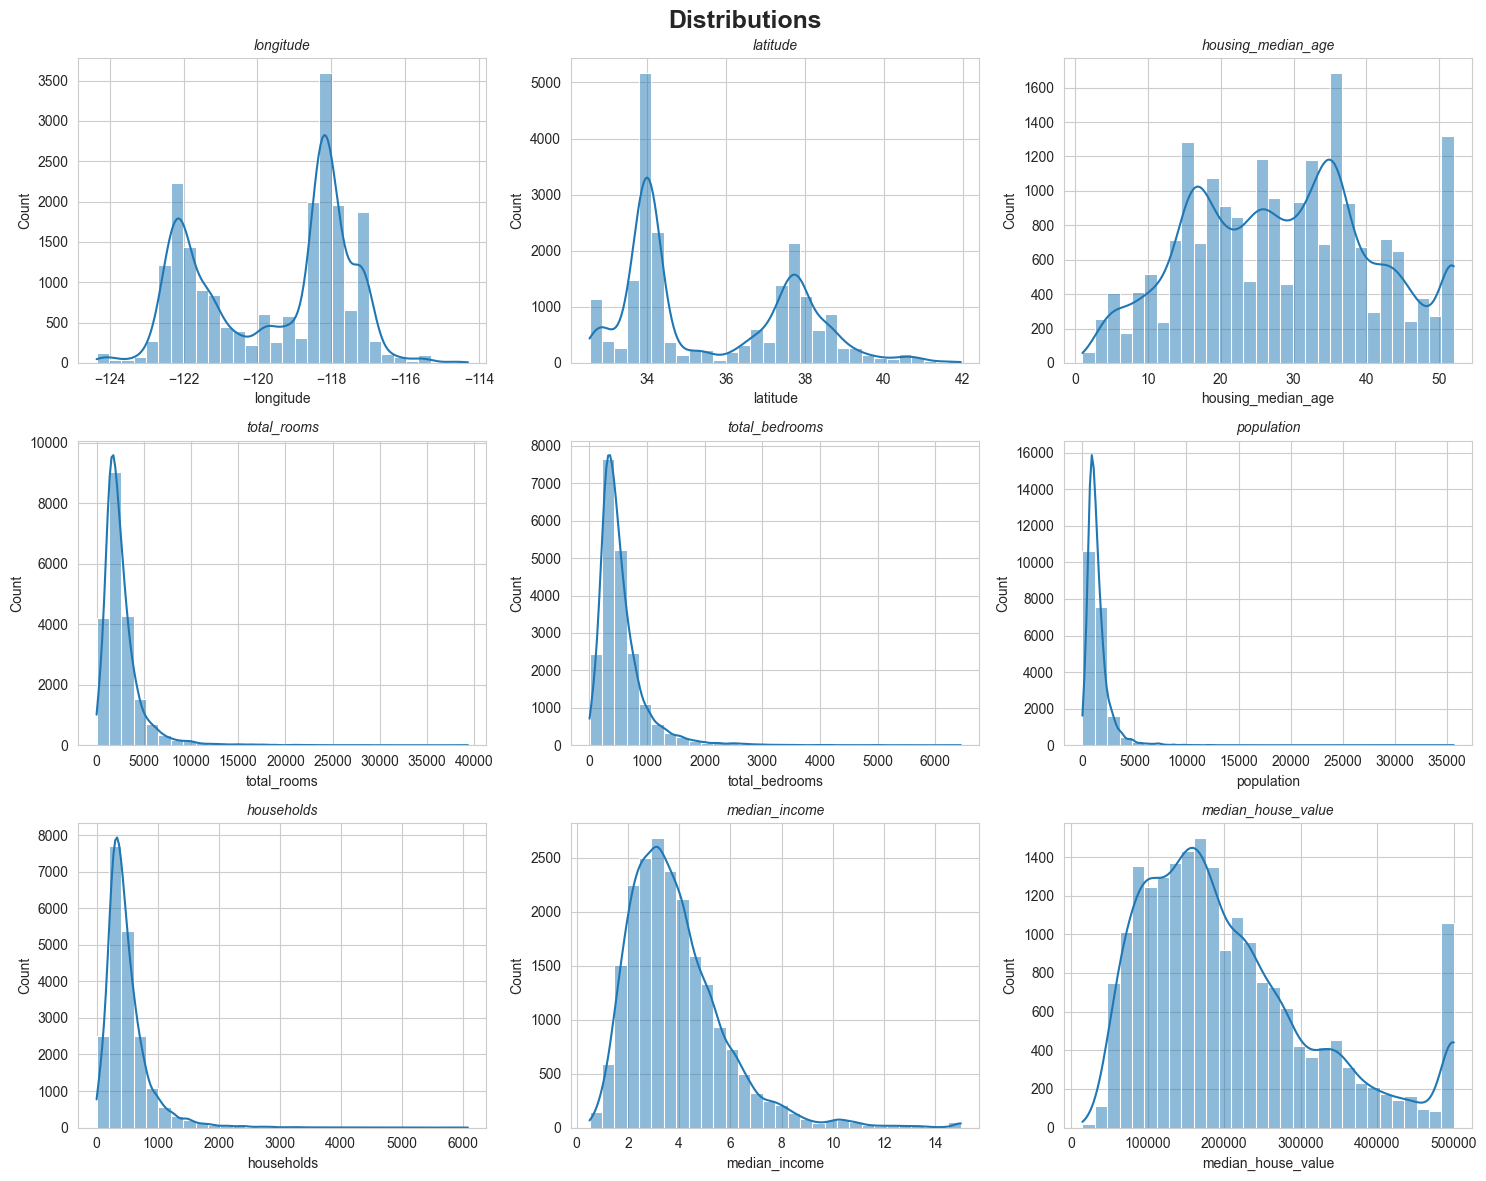

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
histogram(df, numeric_cols)

In [12]:
from sklearn.preprocessing import PowerTransformer

# Eksik değerleri ortalama ile dolduralım (transform için gerekli)
df = df.copy()

# Yeo-Johnson transform uygula
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df.copy()
df_transformed[numeric_cols] = pt.fit_transform(df[numeric_cols])

# Sonuçlara bakalım
df_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-7.216450e-16,1.089038,0.975968,-1.158227,-1.572948,-1.619967,-1.521093,1.903289,1.718078,NEAR BAY
1,-7.216450e-16,1.082404,-0.568893,1.896146,1.436871,1.090355,1.633844,1.897081,1.262941,NEAR BAY
2,-7.216450e-16,1.079079,1.761010,-0.534616,-1.130536,-1.139853,-1.136367,1.604361,1.228314,NEAR BAY
3,-7.216450e-16,1.079079,1.761010,-0.713802,-0.870963,-1.000270,-0.878626,1.051321,1.168611,NEAR BAY
4,-7.216450e-16,1.079079,1.761010,-0.399535,-0.647624,-0.985268,-0.665985,0.205878,1.173649,NEAR BAY


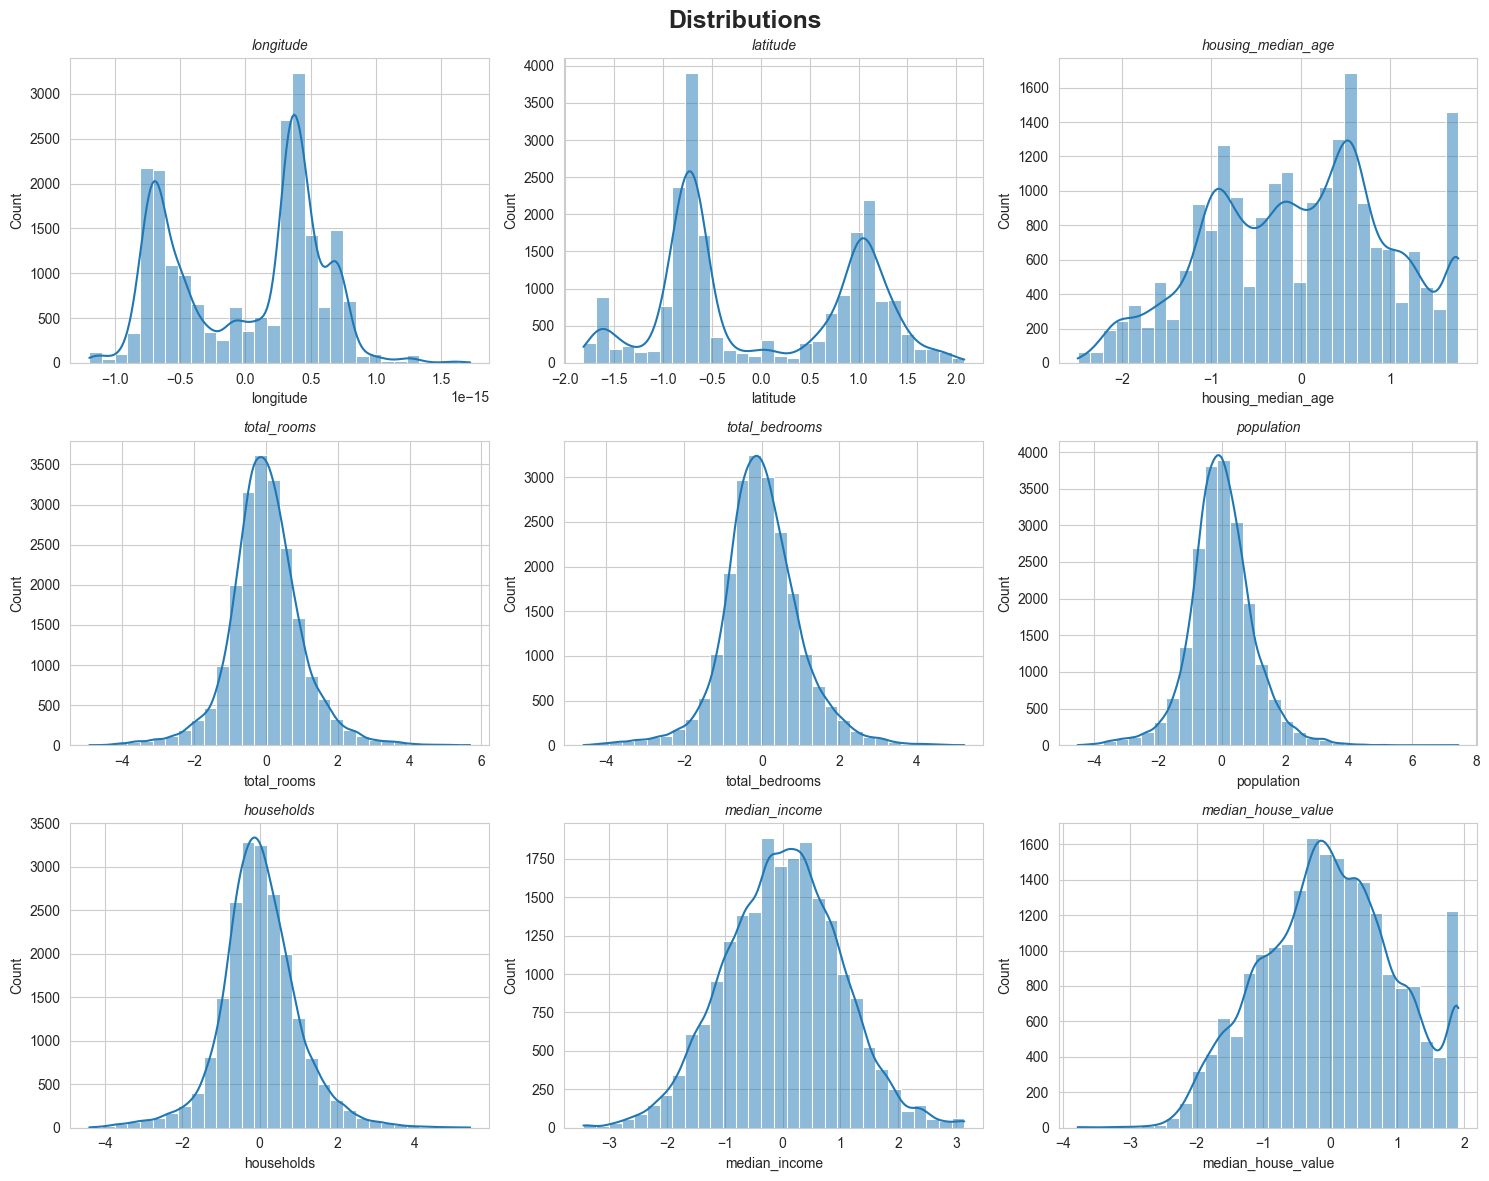

In [14]:
histogram(df_transformed, numeric_cols)
df = df_transformed.copy()

In [15]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.934380,-0.108120,0.035607,0.066953,0.113111,0.058316,-0.016357,-0.028990
latitude,-0.934380,1.000000,0.024328,-0.033711,-0.070855,-0.130030,-0.084813,-0.070663,-0.165307
housing_median_age,-0.108120,0.024328,1.000000,-0.352314,-0.303337,-0.276951,-0.277384,-0.142837,0.076651
total_rooms,0.035607,-0.033711,-0.352314,1.000000,0.940118,0.859943,0.928165,0.267506,0.189223
total_bedrooms,0.066953,-0.070855,-0.303337,0.940118,1.000000,0.894317,0.977192,0.020726,0.086381
population,0.113111,-0.130030,-0.276951,0.859943,0.894317,1.000000,0.926199,0.034334,0.016450
households,0.058316,-0.084813,-0.277384,0.928165,0.977192,0.926199,1.000000,0.052846,0.111471
median_income,-0.016357,-0.070663,-0.142837,0.267506,0.020726,0.034334,0.052846,1.000000,0.680115
median_house_value,-0.028990,-0.165307,0.076651,0.189223,0.086381,0.016450,0.111471,0.680115,1.000000


In [16]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [17]:
find_outliers_iqr(df, threshold = 1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000000e+00,0.000000,0.000000,927.000000,824.000000,841.000000,878.000000,199.000000,16.000000
outlier_percentage,0.000000e+00,0.000000,0.000000,4.491279,3.992248,4.074612,4.253876,0.964147,0.077519
lower_bound,-2.192690e-15,-3.488910,-3.072510,-2.185903,-2.259081,-2.253219,-2.237875,-2.678903,-2.813934
upper_bound,2.026157e-15,3.744465,2.933191,2.172154,2.231907,2.235479,2.225283,2.675677,2.792799


In [18]:
def remove_outliers_from_column(df,target_col, threshold = 1.5):
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

In [19]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [20]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (20624, 10)
all columns cleaning shape:  (19032, 10)


In [21]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [22]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.062400e+04,20624.000000,20624.000000,20624.000000,20417.000000,20624.000000,20624.000000,20624.000000,20624.000000
mean,6.634745e-18,0.000039,-0.000237,0.000922,0.000677,0.000811,0.000859,0.001100,0.002538
std,5.552820e-16,1.000008,0.999929,0.998350,0.998893,0.998161,0.998615,0.999235,0.996203
min,-1.193490e-15,-1.815996,-2.495561,-4.907908,-4.592849,-4.528522,-4.403335,-3.446085,-2.729458
25%,-6.106227e-16,-0.776395,-0.820372,-0.550522,-0.574961,-0.568303,-0.564191,-0.669740,-0.707555
50%,3.053113e-16,-0.566349,0.072278,-0.035245,-0.046328,-0.033590,-0.037699,0.021737,-0.009538
75%,4.440892e-16,1.031949,0.681053,0.537882,0.547786,0.552217,0.551599,0.668094,0.691499
max,1.720846e-15,2.081525,1.761010,5.684875,5.216221,7.450619,5.439466,3.146571,1.916642


In [23]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

/var/folders/0h/_3vs5ymj39b11nq0qq82kq2m0000gn/T/ipykernel_44188/2933163635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [24]:
df_target_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2.062400e+04,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000,20624.000000
mean,6.634745e-18,0.000039,-0.000237,0.000922,0.000205,0.000811,0.000859,0.001100,0.002538
std,5.552820e-16,1.000008,0.999929,0.998350,0.993878,0.998161,0.998615,0.999235,0.996203
min,-1.193490e-15,-1.815996,-2.495561,-4.907908,-4.592849,-4.528522,-4.403335,-3.446085,-2.729458
25%,-6.106227e-16,-0.776395,-0.820372,-0.550522,-0.570522,-0.568303,-0.564191,-0.669740,-0.707555
50%,3.053113e-16,-0.566349,0.072278,-0.035245,-0.046328,-0.033590,-0.037699,0.021737,-0.009538
75%,4.440892e-16,1.031949,0.681053,0.537882,0.540527,0.552217,0.551599,0.668094,0.691499
max,1.720846e-15,2.081525,1.761010,5.684875,5.216221,7.450619,5.439466,3.146571,1.916642


In [25]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [26]:
df_target_clean["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9135
INLAND        6539
NEAR OCEAN    2656
NEAR BAY      2289
ISLAND           5
Name: count, dtype: int64

In [27]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [28]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-7.216450e-16,1.089038,0.975968,-1.158227,-1.572948,-1.619967,-1.521093,1.903289,1.718078,False,False,True,False
1,-7.216450e-16,1.082404,-0.568893,1.896146,1.436871,1.090355,1.633844,1.897081,1.262941,False,False,True,False
2,-7.216450e-16,1.079079,1.761010,-0.534616,-1.130536,-1.139853,-1.136367,1.604361,1.228314,False,False,True,False
3,-7.216450e-16,1.079079,1.761010,-0.713802,-0.870963,-1.000270,-0.878626,1.051321,1.168611,False,False,True,False
4,-7.216450e-16,1.079079,1.761010,-0.399535,-0.647624,-0.985268,-0.665985,0.205878,1.173649,False,False,True,False


In [29]:
X = df_target_clean.drop("median_house_value", axis = 1)
y = df_target_clean["median_house_value"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [32]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [33]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    "Gradient Boost Regressor" : GradientBoostingRegressor(),
    "XGBoost Regressor" : XGBRegressor()
}

In [36]:
r2_scores = dict()
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("Model performance for Training Set")
    print("Root Mean Squared Error: ", model_train_rmse)
    print("Mean Absolute Error: ", model_train_mae)
    print("R2 Score: ", model_train_r2)
    r2_scores[list(models.keys())[i]] = model_train_r2
    print("-----------------------------------")

    print("Model performance for Test Set")
    print("Root Mean Squared Error: ", model_test_rmse)
    print("Mean Absolute Error: ", model_test_mae)
    print("R2 Score: ", model_test_r2)

    print("-----------------------------------")
    print("\n")



Linear Regression
Model performance for Training Set
Root Mean Squared Error:  0.563449228485861
Mean Absolute Error:  0.42806793576110563
R2 Score:  0.6772601492829623
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  0.5736883931372617
Mean Absolute Error:  0.43488132114577727
R2 Score:  0.6749870825848849
-----------------------------------


Lasso
Model performance for Training Set
Root Mean Squared Error:  0.991810020288435
Mean Absolute Error:  0.8035951912718705
R2 Score:  0.0
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  1.0062961412611473
Mean Absolute Error:  0.8204608487188543
R2 Score:  -2.5352445476301e-07
-----------------------------------


Ridge
Model performance for Training Set
Root Mean Squared Error:  0.5634707940154867
Mean Absolute Error:  0.4281091066548267
R2 Score:  0.6772354436354782
-----------------------------------
Model performance for Test Set
Root Mean Squared Err

In [37]:
r2_scores

{'Linear Regression': 0.6772601492829623,
 'Lasso': 0.0,
 'Ridge': 0.6772354436354782,
 'K Neighbors Regressor': 0.8258313204082435,
 'Decision Tree': 1.0,
 'Random Forest Regressor': 0.9752196063274685,
 'Adaboost Regressor': 0.6006977075255429,
 'Gradient Boost Regressor': 0.8003049548676161,
 'XGBoost Regressor': 0.9415294469037543}

In [38]:
xgboost_params = {
        "learning_rate" : [0.1, 0.01],
        "max_depth" : [5,8,12,20,30],
        "n_estimators" : [100,200,300,500],
        "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
randomized_cv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=xgboost_params, cv = 5, n_jobs = -1)

In [41]:
randomized_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             1],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300, 500]})

In [42]:
randomized_cv.best_params_

{'n_estimators': 100,
 'max_depth': 12,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [43]:
model = XGBRegressor(n_estimators = 100, max_depth = 8, learning_rate = 0.1, colsample_bytree = 0.7)

In [44]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print(list(models.keys())[i])
print("Model performance for Training Set")
print("Root Mean Squared Error: ", model_train_rmse)
print("Mean Absolute Error: ", model_train_mae)
print("R2 Score: ", model_train_r2)

print("-----------------------------------")

print("Model performance for Test Set")
print("Root Mean Squared Error: ", model_test_rmse)
print("Mean Absolute Error: ", model_test_mae)
print("R2 Score: ", model_test_r2)

print("-----------------------------------")
print("\n")

XGBoost Regressor
Model performance for Training Set
Root Mean Squared Error:  0.23601752501882495
Mean Absolute Error:  0.1747972901896288
R2 Score:  0.9433719612766579
-----------------------------------
Model performance for Test Set
Root Mean Squared Error:  0.3953074514822686
Mean Absolute Error:  0.27875459156128823
R2 Score:  0.8456813209969887
-----------------------------------




In [46]:
#Transform öncesi
#XGBoost Regressor
#Model performance for Training Set
#Root Mean Squared Error:  23681.97998515705
#Mean Absolute Error:  16872.129848307006
#R2 Score:  0.9380287073772045
#-----------------------------------
#Model performance for Test Set
#Root Mean Squared Error:  41658.923266971084
#Mean Absolute Error:  28232.32337442514
#R2 Score:  0.8122412997763372
#-----------------------------------